In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.datasets import cifar10

In [2]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


In [4]:
x_train = x_train.reshape(50000,3072).astype('float32')
x_test = x_test.reshape(10000,3072).astype('float32')

In [5]:
x_train/=255
x_test/=255

In [6]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [7]:
model = Sequential()
model.add(Dense(2048, activation='relu', input_dim = 3072))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2048)              6293504   
                                                                 
 dense_1 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout (Dropout)           (None, 1024)              0         
                                                                 
 dense_2 (Dense)             (None, 512)               524800    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                5130      
                                                                 
Total params: 8,921,610
Trainable params: 8,921,610
Non-

In [8]:
history=model.fit(x_train, y_train, batch_size=64, epochs=100, validation_split=0.2)

Epoch 1/100
625/625 [==============================] - 7s 10ms/step - loss: 1.9640 - accuracy: 0.2900 - val_loss: 1.8090 - val_accuracy: 0.3514
Epoch 2/100
625/625 [==============================] - 5s 9ms/step - loss: 1.7412 - accuracy: 0.3728 - val_loss: 1.7646 - val_accuracy: 0.3702
Epoch 3/100
625/625 [==============================] - 5s 9ms/step - loss: 1.6691 - accuracy: 0.4013 - val_loss: 1.6294 - val_accuracy: 0.4204
Epoch 4/100
625/625 [==============================] - 5s 9ms/step - loss: 1.6048 - accuracy: 0.4258 - val_loss: 1.5770 - val_accuracy: 0.4351
Epoch 5/100
625/625 [==============================] - 5s 9ms/step - loss: 1.5586 - accuracy: 0.4407 - val_loss: 1.5364 - val_accuracy: 0.4541
Epoch 6/100
625/625 [==============================] - 5s 9ms/step - loss: 1.5309 - accuracy: 0.4509 - val_loss: 1.5634 - val_accuracy: 0.4434
Epoch 7/100
625/625 [==============================] - 5s 9ms/step - loss: 1.4945 - accuracy: 0.4646 - val_loss: 1.5015 - val_accuracy: 0.463

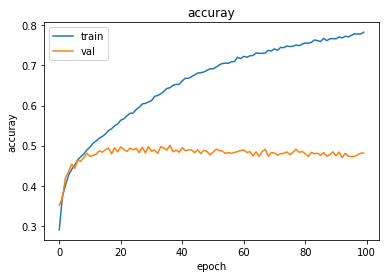

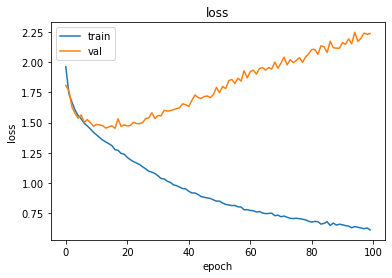

In [9]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('accuray')
plt.ylabel('accuray')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'])
plt.show()

In [10]:
score = model.evaluate(x_test, y_test, batch_size=64)
print("score:", score)

157/157 [==============================] - 1s 5ms/step - loss: 2.1871 - accuracy: 0.4845
score: [2.187056541442871, 0.484499990940094]
